# Introduction to Linear Regression


In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
x = np.array([10, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([10, 20, 14, 32, 37, 50])

In [3]:
x

array([[10],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [4]:
y

array([10, 20, 14, 32, 37, 50])

In [5]:
model = LinearRegression()

In [6]:
model.fit(x, y)

LinearRegression()

In [7]:
model = LinearRegression().fit(x, y)

In [8]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8980798316435407


In [9]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 1.6383561643835627
slope: [0.82794521]


In [10]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 9.91780822 14.05753425 22.3369863  30.61643836 38.89589041 47.17534247]


In [11]:
y

array([10, 20, 14, 32, 37, 50])

### Simple Linear Regression

In [12]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [13]:
dataset = pd.read_csv('datasets/Weather.csv')

In [14]:
dataset.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
dataset.tail()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
23713,11606,1944-11-22,4.826,NaN,28.888889,24.444444,26.666667,0.0,1,44,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23714,11606,1944-11-23,10.414,NaN,27.222222,23.333333,25.555556,0.0,1,44,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23715,11606,1944-11-24,4.572,NaN,29.444444,24.444444,26.666667,0.0,1,44,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23716,11606,1944-11-25,0,NaN,30.000000,26.666667,28.333333,0.0,NaN,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23717,11606,1944-11-26,1.016,NaN,30.000000,23.888889,26.666667,0.0,1,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
dataset.shape

(23718, 31)

In [17]:
dataset.isnull().sum()

STA                0
Date               0
Precip             0
WindGustSpd    23718
MaxTemp            0
MinTemp            0
MeanTemp           0
Snowfall           4
PoorWeather    14133
YR                 0
MO                 0
DA                 0
PRCP             320
DR             23718
SPD            23718
MAX              233
MIN              237
MEA              237
SNF                5
SND            22507
FT             23718
FB             23718
FTI            23718
ITH            23718
PGT            23718
TSHDSBRSGF     14134
SD3            23718
RHX            23718
RHN            23718
RVG            23718
WTE            23718
dtype: int64

In [18]:
dataset.iloc[:,-12:]

,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
23713,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23714,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23715,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
dataset.drop(labels=dataset.iloc[:,-12:].columns,inplace=True,axis=1)

In [20]:
dataset.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SNF
count,23718.000000,0.0,23718.000000,23718.000000,23718.000000,23714.0,23718.000000,23718.000000,23718.000000,0.0,0.0,23485.000000,23481.000000,23481.000000,23713.0
mean,10790.522852,NaN,29.716320,22.154739,25.935155,0.0,43.598912,6.789864,15.799604,NaN,NaN,86.337535,72.600826,79.474043,0.0
std,484.715692,NaN,5.273870,4.544255,4.755754,0.0,1.222056,3.457112,8.795097,NaN,NaN,4.216562,3.889824,3.341701,0.0
min,10001.000000,NaN,-17.777778,-17.777778,-17.777778,0.0,40.000000,1.000000,1.000000,NaN,NaN,63.000000,51.000000,60.000000,0.0
25%,10505.000000,NaN,28.888889,21.666667,25.555556,0.0,43.000000,4.000000,8.000000,NaN,NaN,84.000000,71.000000,78.000000,0.0
50%,10718.000000,NaN,30.555556,22.777778,26.666667,0.0,44.000000,7.000000,16.000000,NaN,NaN,87.000000,73.000000,80.000000,0.0
75%,10807.000000,NaN,31.666667,23.888889,27.777778,0.0,45.000000,10.000000,23.000000,NaN,NaN,89.000000,75.000000,82.000000,0.0
max,11606.000000,NaN,38.888889,28.888889,31.666667,0.0,45.000000,12.000000,31.000000,NaN,NaN,102.000000,84.000000,89.000000,0.0


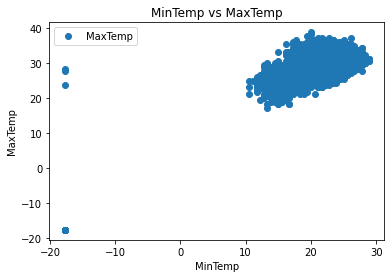

In [24]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

C:\Users\ASUS VivaBook\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

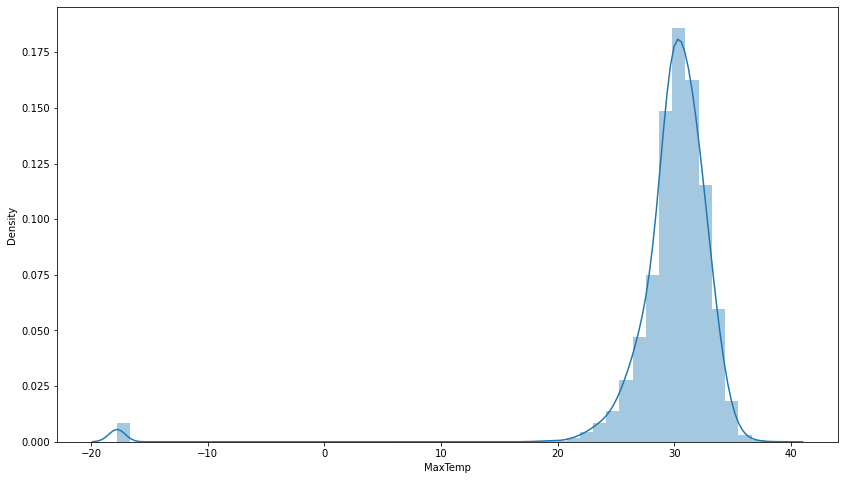

In [26]:
plt.figure(figsize=(14,8))
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])

In [27]:
dataset['MinTemp'].values.mean

<function ndarray.mean>

In [28]:
dataset['MinTemp'].values.reshape(-1,1)

array([[22.22222222],
       [21.66666667],
       [22.22222222],
       ...,
       [24.44444444],
       [26.66666667],
       [23.88888889]])

### Train and Test Splitting
#### The test_size variable is where we actually specify the proportion of the test set.


In [29]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Fitting
#### Time is to train our algorithm. For that, we need to import LinearRegression class, instantiate it, and call the fit() method along with our training data.



In [31]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

### Intercept and Coefficient
#### Linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. 

#### To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code:


In [32]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[7.60815636]
[[0.99768578]]


### Prediction
#### This means that for every one unit of change in Min temperature, the change in the Max temperature is about 0.92%.

In [33]:
y_pred = regressor.predict(X_test)

### Evaluation of Model
#### This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, these evaluation metrics are commonly used

In [34]:
R2 = metrics.r2_score(y_test, y_pred)
print('R^2:' , R2)
n = X_test.shape[0] #sample size
p = X_test.shape[1] #number of predictors
print('Adjusted R^2 :' , 1-(1-R2)*(n-1)/(n-p-1))
print('Adjusted R^2 :'  , 1 - metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R^2: 0.7240695682680656
Adjusted R^2 : 0.724011379648974
Adjusted R^2 : 0.27593043173193443
Mean Absolute Error: 2.160170765183202
Mean Squared Error: 7.458655087846456
Root Mean Squared Error: 2.731053841989655


In [35]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,31.666667,34.213110
1,29.444444,30.333221
2,31.666667,28.670412
3,28.888889,29.224682
4,28.888889,30.333221
...,...,...
4739,31.111111,30.887491
4740,33.333333,30.333221
4741,28.888889,31.441761
4742,31.111111,28.670412


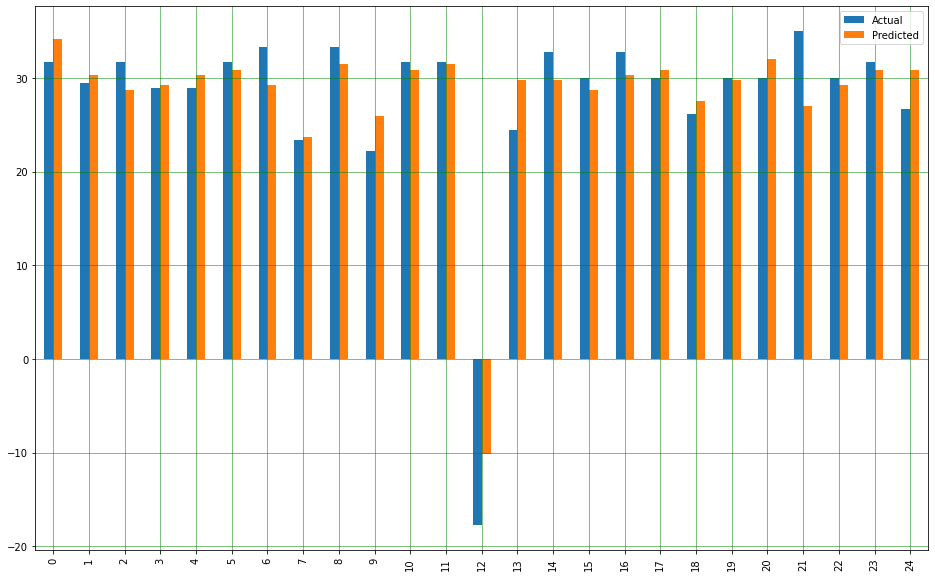

In [36]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

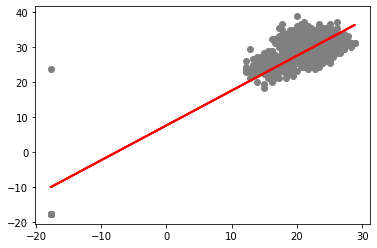

In [37]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

### You can see that the value of root mean squared error is 4.19, which is more than 10% of the mean value of the percentages of all the temperature i.e. 22.41. This means that our algorithm was not very accurate but can still make reasonably good predictions.

In [38]:
dataset = pd.read_csv('datasets/winequality.csv')

In [39]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [40]:
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [41]:
X = dataset[['fixed acidity', 
             'volatile acidity', 
             'citric acid', 
             'residual sugar', 
             'chlorides', 
             'free sulfur dioxide', 
             'total sulfur dioxide', 
             'density', 
             'pH', 
             'sulphates',
             'alcohol']]
y = dataset['quality']

C:\Users\ASUS VivaBook\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

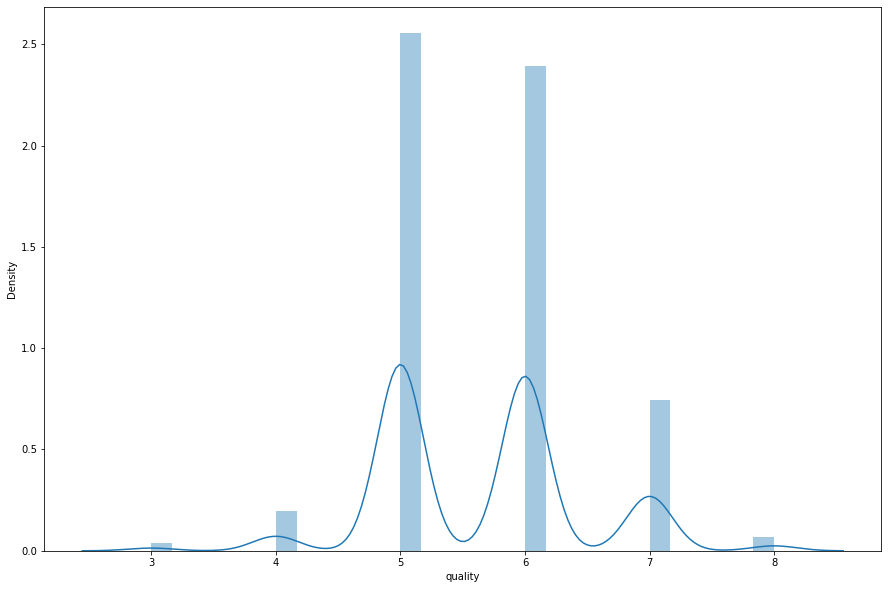

In [42]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['quality'])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [45]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


In [46]:
y_pred = regressor.predict(X_test)

In [47]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

In [48]:
df1

,Actual,Predicted
1109,6,5.782930
1032,5,5.036193
1002,7,6.596989
487,6,5.339126
979,5,5.939529
1054,6,5.007207
542,5,5.396162
853,6,6.052112
1189,4,4.867603
412,5,4.950676


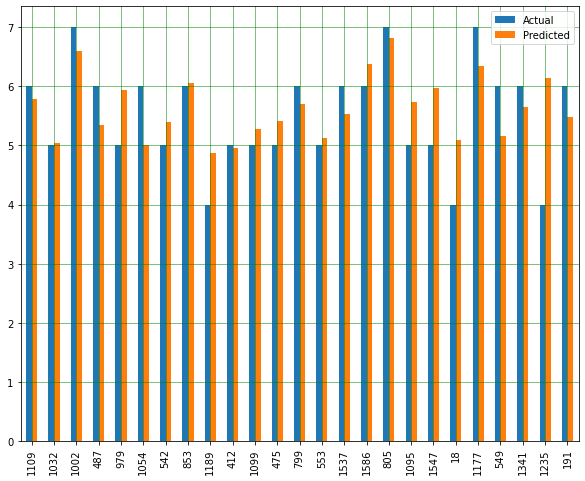

In [49]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4696330928661115
Mean Squared Error: 0.384471197820125
Root Mean Squared Error: 0.6200574149384273


In [51]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y_test.to_numpy().reshape(-1,1), y_pred.reshape(-1,1)))

r2_score 0.3283887639580212


## Multiple Linear Regression



In [52]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])

X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Stock_Index_Price']
 
    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

# with sklearn
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn

print ('Predicted Stock Index Price: \n', regr.predict(X_test))


Intercept: 
 1431.7903008531664
Coefficients: 
 [ 370.54204888 -194.83930977]
Predicted Stock Index Price: 
 [1023.32247097 1062.29033293  872.23516582  950.17088973  930.68695875]


# Unsupervised Learning

### K-Means

In [53]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt


import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [54]:
df = pd.read_csv('datasets/Mall_Customers.csv')

In [55]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [56]:
cols = df.columns
df.columns = [col.lower() for col in cols]

df.rename(columns={'annual income (k$)' : 'ann_income', 
                    'spending score (1-100)' : 'sp_score'},
                   inplace=True)

df.head()

,customerid,gender,age,ann_income,sp_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<AxesSubplot:xlabel='gender', ylabel='count'>

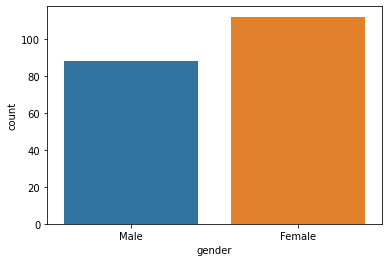

In [57]:
sns.countplot(x='gender',data=df) # Count Plot of Gender

<AxesSubplot:xlabel='gender', ylabel='age'>

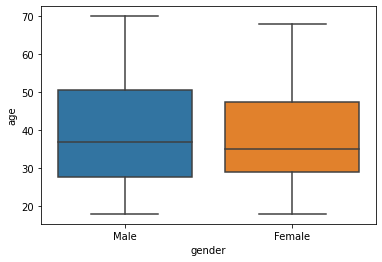

In [58]:
sns.boxplot(x='gender',y='age',data=df)

<AxesSubplot:xlabel='gender', ylabel='ann_income'>

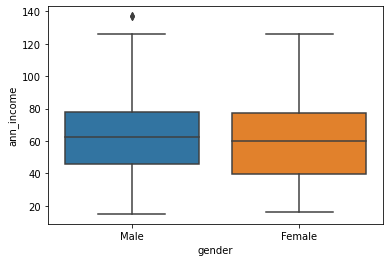

In [59]:
sns.boxplot(x='gender',y='ann_income',data=df)

In [60]:
#Let's check the data before clustering. For this purpose, I will use x1=Age and x2=Spending Score (1-100)

In [61]:
X = df.iloc[:, [3, 4]].values

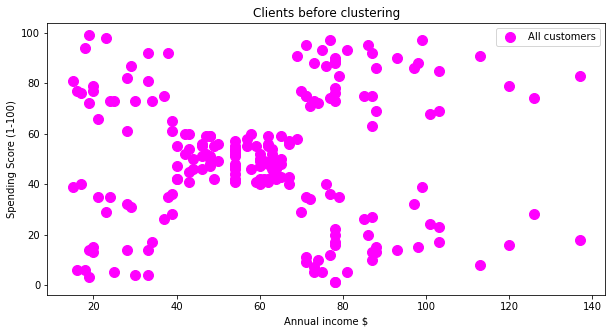

In [62]:
fig = plt.figure(figsize = (10,5))
plt.scatter(X[:,0],X[:,1],s=100,c='magenta',label='All customers')
plt.title('Clients before clustering')
plt.xlabel('Annual income $')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

C:\Users\ASUS VivaBook\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


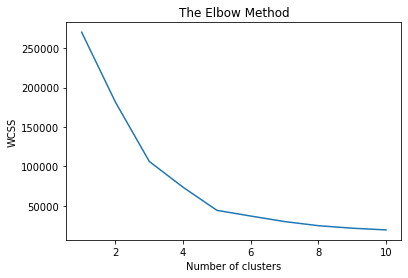

In [63]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [64]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [65]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [66]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [67]:
#Annual income and spending score of people from 0th cluster
X[y_kmeans==0]

array([[39, 61],
       [40, 55],
       [40, 47],
       [40, 42],
       [40, 42],
       [42, 52],
       [42, 60],
       [43, 54],
       [43, 60],
       [43, 45],
       [43, 41],
       [44, 50],
       [44, 46],
       [46, 51],
       [46, 46],
       [46, 56],
       [46, 55],
       [47, 52],
       [47, 59],
       [48, 51],
       [48, 59],
       [48, 50],
       [48, 48],
       [48, 59],
       [48, 47],
       [49, 55],
       [49, 42],
       [50, 49],
       [50, 56],
       [54, 47],
       [54, 54],
       [54, 53],
       [54, 48],
       [54, 52],
       [54, 42],
       [54, 51],
       [54, 55],
       [54, 41],
       [54, 44],
       [54, 57],
       [54, 46],
       [57, 58],
       [57, 55],
       [58, 60],
       [58, 46],
       [59, 55],
       [59, 41],
       [60, 49],
       [60, 40],
       [60, 42],
       [60, 52],
       [60, 47],
       [60, 50],
       [61, 42],
       [61, 49],
       [62, 41],
       [62, 48],
       [62, 59],
       [62, 55

In [68]:
#Annual income from people 0th cluster
X[y_kmeans==0,0]

array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
       47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
       60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
       64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 72, 76], dtype=int64)

In [69]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

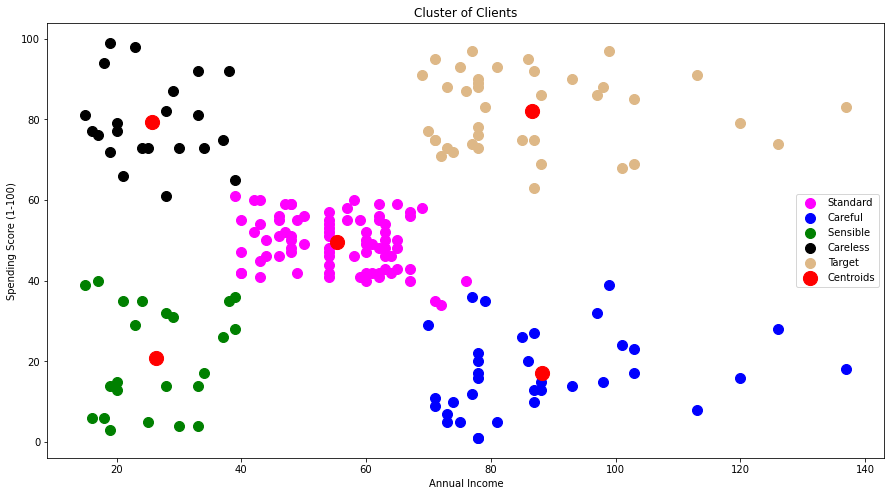

In [70]:
#Lets plot those clusters!
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta',label='Standard')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Careful')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Sensible ')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='black',label='Careless')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='burlywood',label='Target')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [71]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

# Hierarchical clustering

<b>Hierarchical clustering </b> (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:

- <b>Agglomerative </b>: This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
- <b>Divisive </b>: This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

In general, the merges and splits are determined in a greedy manner. The results of hierarchical clustering are usually presented in a dendrogram.

## Agglomerative Clustering

Initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until 1/ K clusters are formed.

The main advantage is that we don’t need to specify the number of clusters, this comes with a price: performance $O(n^3)$. In sklearn’s implementation, we can specify the number of clusters to assist the algorithm’s performance.

### Algorithm
- Compute the proximity matrix
- Let each data point be a cluster
- Repeat: Merge two closest clusters and update the proximity matrix until 1/ K cluster remains

Ex. - We have six data points {A,B,C,D,E,F}.

- In the initial step, we consider all the six data points as individual clusters as shown in the image below.

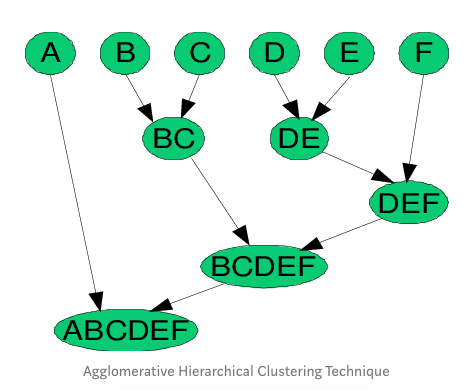

- The first step is to determine which elements to merge in a cluster. Usually, we want to take the two closest elements, according to the chosen distance.We construct a distance matrix at this stage, where the number in the i-th row j-th column is the distance between the i-th and j-th elements. Then, as clustering progresses, rows and columns are merged as the clusters are merged and the distances updated.

#### Computation of proximity/distance matrix

The choice of an appropriate metric will influence the shape of the clusters, as some elements may be close to one another according to one distance and farther away according to another. For example, in a 2-dimensional space, the distance between the point (1,0) and the origin (0,0) is always 1 according to the usual norms, but the distance between the point (1,1) and the origin (0,0) can be 2 under Manhattan distance, $\sqrt2$ under Euclidean distance, or 1 under maximum distance.

Some commonly used metrics for hierarchical clustering are:

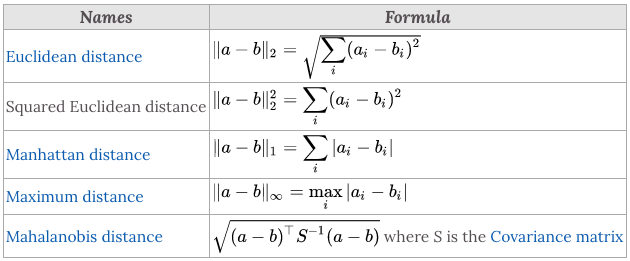

For text or other non-numeric data, metrics such as the Hamming distance or Levenshtein distance are often used.

- Similar clusters are merged together and formed as a single cluster. Let’s consider B,C, and D,E are similar clusters that are merged in step two. Now, we’re left with four clusters which are A, BC, DE, F. To calculate the proximity between two clusters, we need to define the distance between them. Usually the distance is one of the following:
     - The maximum distance between elements of each cluster (also called  <b> complete-linkage clustering </b>)
     - The minimum distance between elements of each cluster (also called <b> single-linkage clustering </b>)
     - The mean distance between elements of each cluster (also called <b> average linkage clustering </b>)
     - The sum of all intra-cluster variance.
- Again calculate the proximity of new clusters and merge the similar clusters to form new clusters A, BC, DEF.
- Calculate the proximity of the new clusters. The clusters DEF and BC are similar and merged together to form a new cluster. We’re now left with two clusters A, BCDEF.
- Finally, all the clusters are merged together and form a single cluster.



The Hierarchical clustering Technique can be visualized using a Dendrogram.
A Dendrogram is a tree-like diagram that records the sequences of merges or splits.

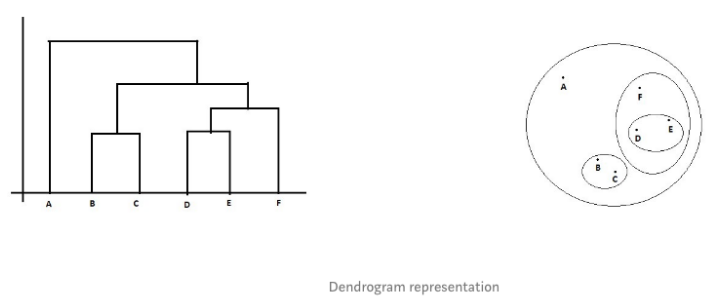

### Example


# Hierarchical

**Importing the dataset**

In [72]:
# df=pd.read_csv('datasets/Mall_Customers.csv')
# df.head()

**Creating the matrix of Features**

In [73]:
# X=df.iloc[:,[3,4]].values

**Dendogram to find optimal number of clusters**

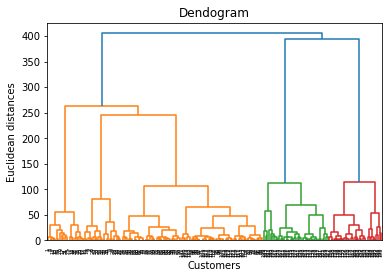

In [74]:

# import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(X,method='ward')) # Within cluster variance is reduced with ward method
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

We have to look at the longest vertical line which is not intercepted by a horizontal line.After we find out the longest vertical line we have to split it horizontally.All the clusters below the split will be our optimium number of clusters.In the above case 3rd line from left is the longest uninterupted line.If we were to split it with a horizontal line we will get five clusters below it.So five will be the optimium number of clusters for our dataset.

**Fitting Hierarchical clustering to data**

In [75]:
# from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

**Visualizing the cluster**

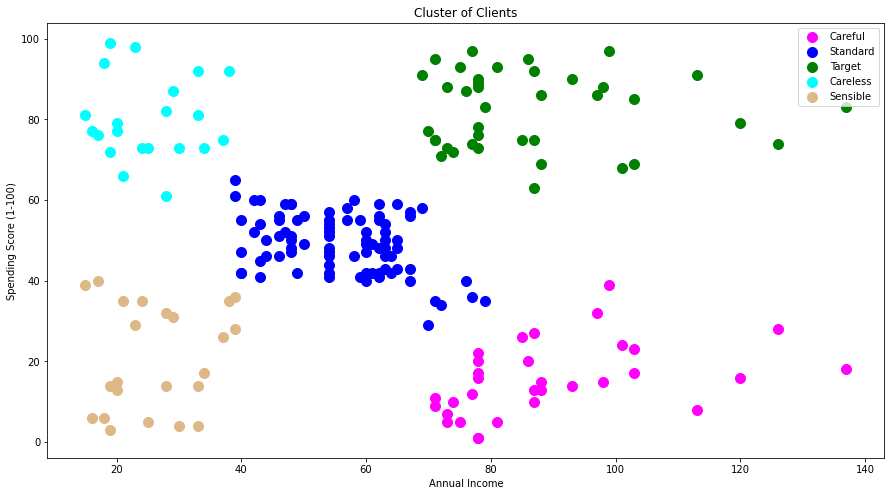

In [76]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='magenta',label='Careful')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='Standard')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label='Target')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='cyan',label='Careless')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='burlywood',label='Sensible')
plt.title('Cluster of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.ioff()
plt.show()

Based on the above clusters we can do targetted marketing and increase our sales

# Model

In [77]:
df2 = pd.read_csv('datasets/musteriler.csv')

In [78]:
df2.head()

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450


In [79]:
cols = df2.columns
df2.columns = [col.lower() for col in cols]

df2.rename(columns={'cinsiyet' : 'gender', 
                    'yas' : 'age',
                    'hacim':'weight',
                    'maas':'income'
                   },
                   inplace=True)

df2.head()

,no,gender,age,weight,income
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450


In [80]:
X_ = df2.iloc[:,3:].values
X_[:,0]#weight
X_[:,1]#income

array([ 6325,  5200,  7825,  8375,  5450,  8550,  4500,  5050,  8325,
        5975,  5700,  6475,  3850,  4100,  8125,  8650,  5125,  3950,
        5325,  5775,  3400,  7075,  5725,  4300,  7500,  5000,  5325,
        5350,  2600,  6250,  3075,  4875,  5525,  7225,  5275,  6050,
        3425,  4600,  4575,  8525,  8100,  4725,  7425,  6200,  5875,
        4025,  4150,  5625,  5300,  6350,  5800,  6325,  8800,  8400,
        5650,  6800,  4725,  5575,  3675,  5775,  7550,  6525,  4525,
        7925,  8800,  4100,  5175,  6350,  6575,  4375,  5875,  9250,
        6650,  7775,  3575,  7650,  7825,  8525,  5700,  8575,  3975,
        4075,  4925,  4175,  7075,  7450,  8575,  3825,  4850,  6600,
        8350,  7950,  7725,  6800,  3425,  7725,  4400,  9175,  5250,
        2650,  6950,  9575,  7625,  2600,  7775,  9125,  8675,  4500,
        5925,  6800,  9250,  5750, 10075,  5375,  5725,  3250,  8475,
        7925,  2675,  9800,  5300,  4550,  6325,  5900,  5500,  4550,
        2725,  3425,

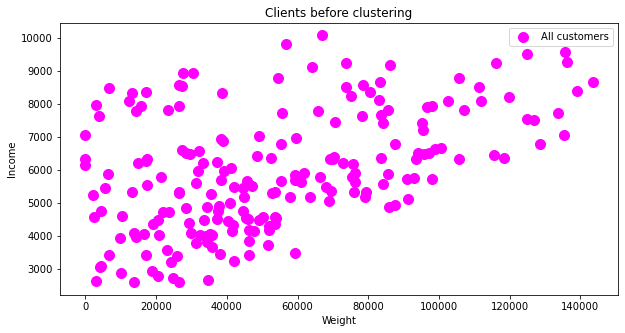

In [81]:
fig = plt.figure(figsize = (10,5))
plt.scatter(X_[:,0],X_[:,1],s=100,c='magenta',label='All customers')
plt.title('Clients before clustering')
plt.xlabel('Weight')
plt.ylabel('Income')
plt.legend()
plt.show()

**K-Means Clustering**

C:\Users\ASUS VivaBook\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


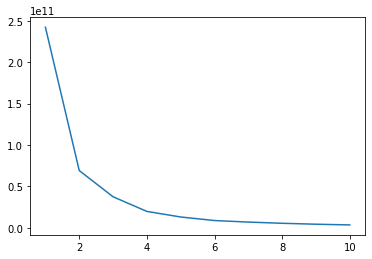

In [82]:
wcss_2 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state= 123)
    kmeans.fit(X_)
    wcss_2.append(kmeans.inertia_)

plt.plot(range(1,11),wcss_2)

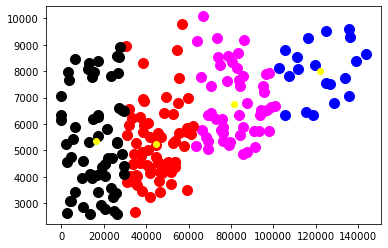

In [83]:
kmeans = KMeans( n_clusters = 4, init = 'k-means++')
y_kmeans2= kmeans.fit_predict(X_)


plt.scatter(X_[y_kmeans2==0,0],X_[y_kmeans2==0,1],s=100,c='magenta',label='Standard')
plt.scatter(X_[y_kmeans2==1,0],X_[y_kmeans2==1,1],s=100,c='red',label='Standard')
plt.scatter(X_[y_kmeans2==2,0],X_[y_kmeans2==2,1],s=100,c='blue',label='Standard')
plt.scatter(X_[y_kmeans2==3,0],X_[y_kmeans2==3,1],s=100,c='black',label='Standard')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = "yellow")
plt.show()


**Hierarchical Clustering**

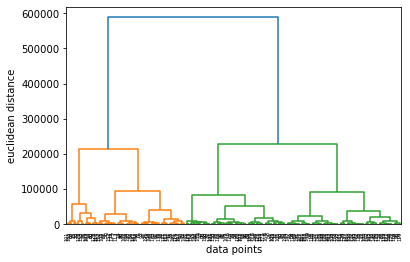

In [84]:
# %% dendogram
merg = linkage(X_,method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

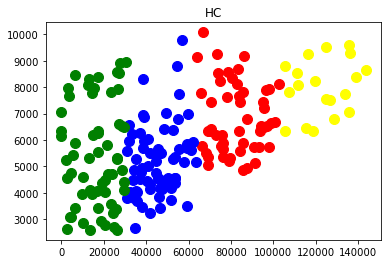

In [85]:
#HC

ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hc_predict = ac.fit_predict(X_)

plt.scatter(X_[hc_predict==0,0],X_[hc_predict==0,1],s=100, c='red')
plt.scatter(X_[hc_predict==1,0],X_[hc_predict==1,1],s=100, c='blue')
plt.scatter(X_[hc_predict==2,0],X_[hc_predict==2,1],s=100, c='green')
plt.scatter(X_[hc_predict==3,0],X_[hc_predict==3,1],s=100, c='yellow')
plt.title('HC')
plt.show()

## Clustering

### Biomechanical features of orthopedic patients

Each patient is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (each one is a column):

- pelvic incidence
- pelvic tilt
- lumbar lordosis angle
- sacral slope
- pelvic radius
- grade of spondylolisthesis

In [86]:
#We read data
df3 = pd.read_csv("datasets/column_2C_weka.csv")

In [87]:
df3.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [88]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


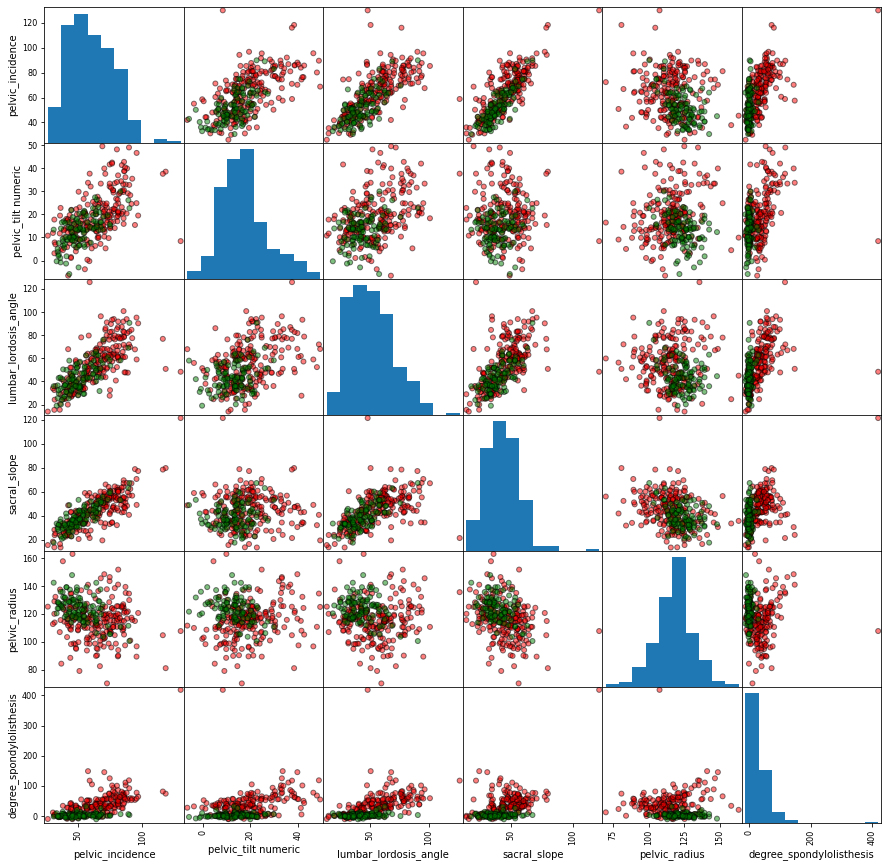

In [89]:
def color_generate():
    colors=[]
    for i in df3.loc[:,'class']:
        if i=='Abnormal':
            colors.append('red')
        else:
            colors.append('green')
    return colors
        
pd.plotting.scatter_matrix(df3.loc[:, df3.columns != 'class'],
                                       c=color_generate(),
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 100,
                                       edgecolor= "black")
plt.show()

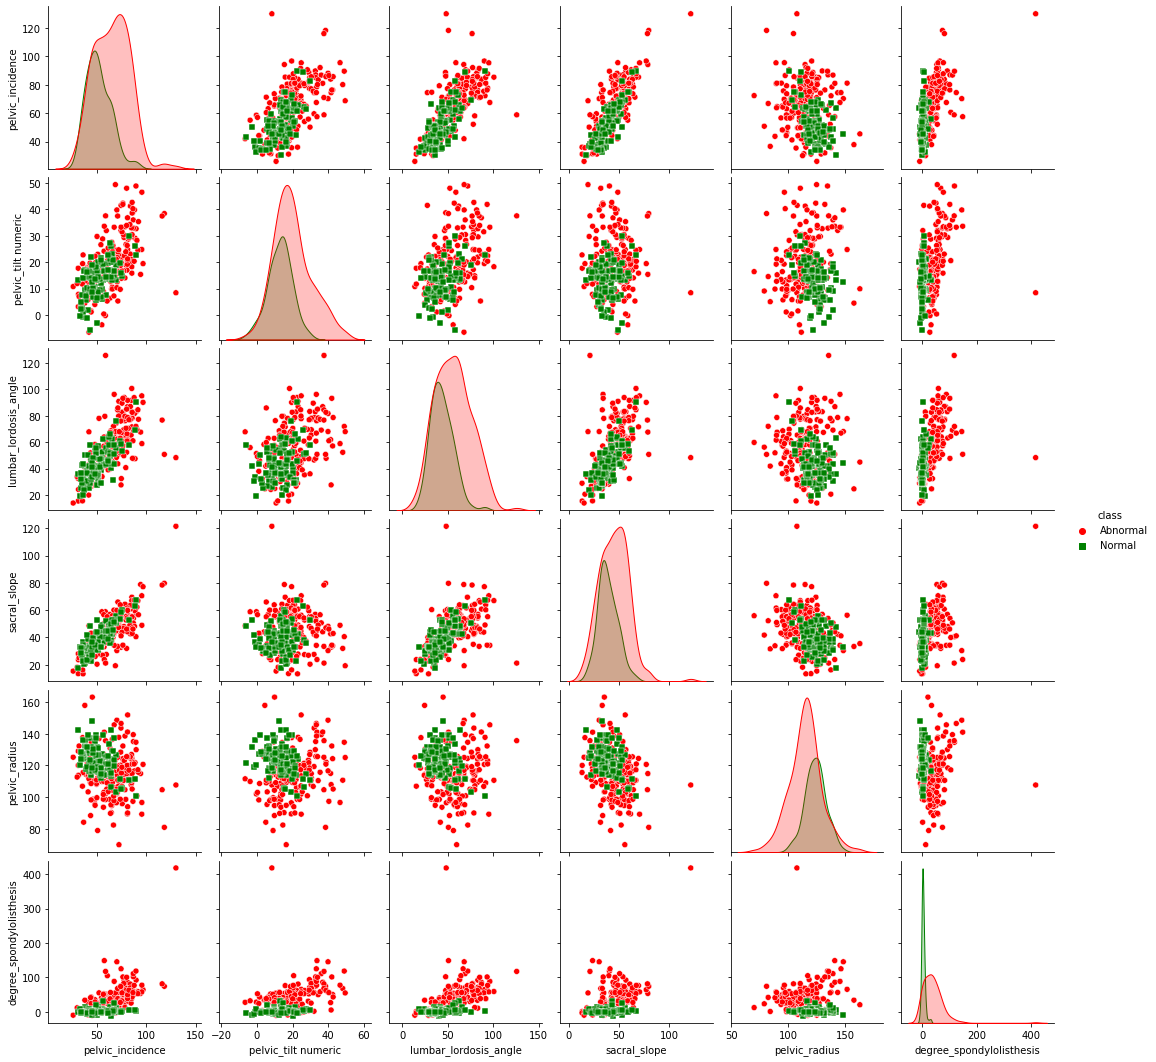

In [90]:
sns.pairplot(df3, hue="class", markers=["o", "s"], palette={"Abnormal":"red","Normal":"green"})

Abnormal    210
Normal      100
Name: class, dtype: int64

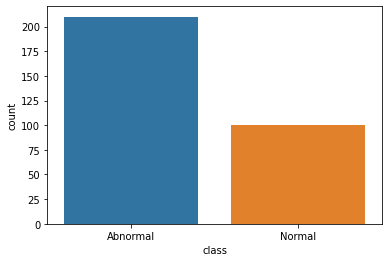

In [91]:
sns.countplot(x="class", data=df3)
df3.loc[:,'class'].value_counts()

<AxesSubplot:>

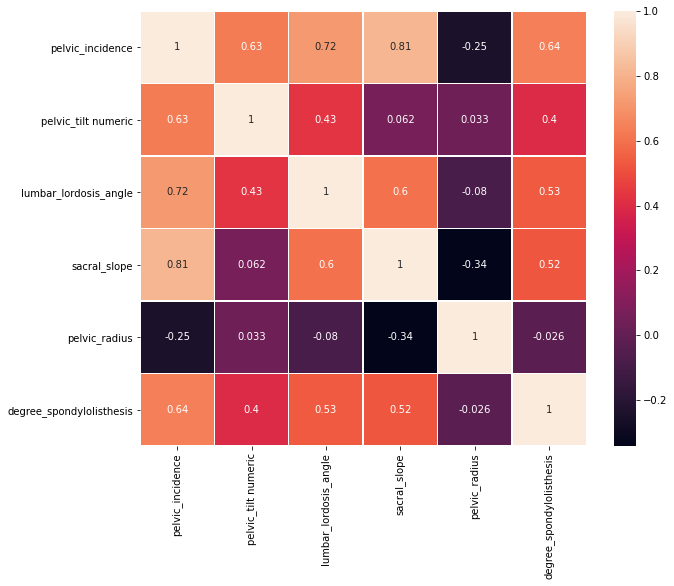

In [92]:
corr=df3.corr()
fig, ax=plt.subplots(1,1,figsize=(10,8))
sns.heatmap(corr,annot=True, linewidth=.5, ax=ax)

We have this data but data point in yellow circle if we drop this data we will wrong with separate clusters that's why we drop it

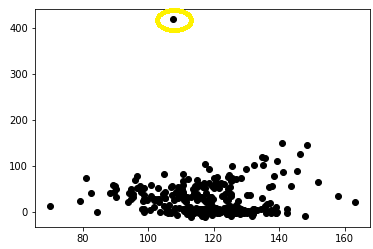

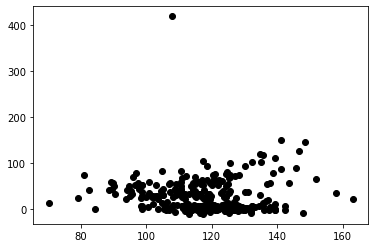

In [93]:
x1 = df3["pelvic_radius"]
x2 = df3["degree_spondylolisthesis"]
plt.scatter(x1 ,x2 ,color = "black")

In [94]:
#We ignore this
mean=df3.degree_spondylolisthesis.mean()
a = df3.degree_spondylolisthesis.max()
df3[df3.degree_spondylolisthesis == a] = mean


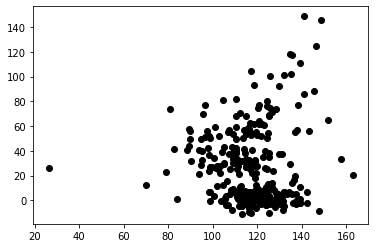

In [95]:
#We use sacral_radius and pelvic incidence for showing our cluster.
plt.scatter(x1 ,x2 ,color = "black")


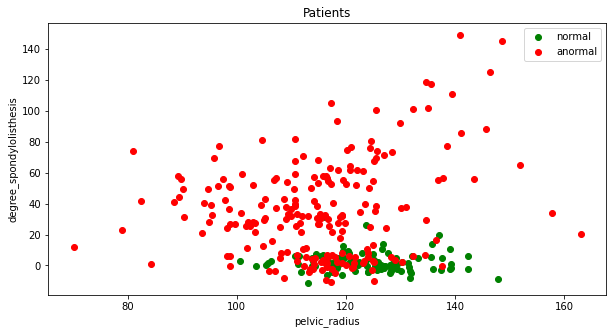

In [96]:
fig = plt.figure(figsize = (10,5))
plt.title('Patients')
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.scatter(df3[df3["class"] == "Normal"].pelvic_radius , df3[df3["class"] == "Normal"].degree_spondylolisthesis,color = "green",label="normal")
plt.scatter(df3[df3["class"] == "Abnormal"].pelvic_radius , df3[df3["class"] == "Abnormal"].degree_spondylolisthesis,color = "red",label="anormal")
plt.legend()
plt.show()

In [97]:
cluster_data=pd.DataFrame({"x1":x1,"x2":x2})
cluster_data

,x1,x2
0,98.672917,-0.254400
1,114.405425,4.564259
2,105.985135,-3.530317
3,101.868495,11.211523
4,108.168725,7.918501
...,...,...
305,117.449062,-4.245395
306,114.365845,-0.421010
307,125.670725,-2.707880
308,118.545842,0.214750


C:\Users\ASUS VivaBook\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


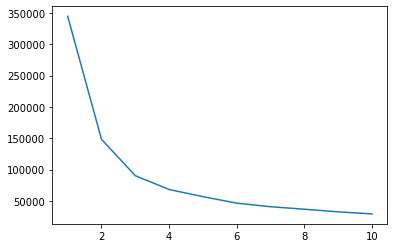

In [98]:
wcss_3 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state= 123)
    kmeans.fit(cluster_data)
    wcss_3.append(kmeans.inertia_)

plt.plot(range(1,11),wcss_3)


In [99]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(cluster_data)

In [100]:
df3['cluster']=y_kmeans

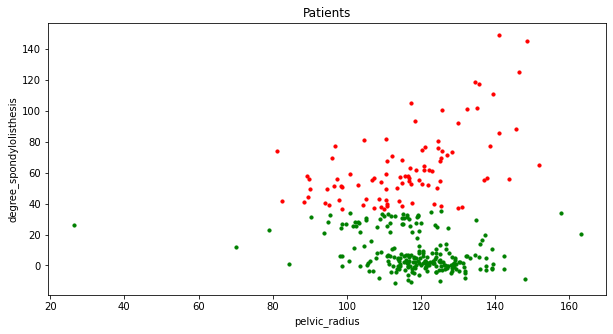

In [101]:
fig = plt.figure(figsize = (10,5))
plt.title('Patients')
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.scatter(cluster_data['x1'][y_kmeans==0],cluster_data['x2'][y_kmeans==0],s=10,c='green',label='Normal')
plt.scatter(cluster_data['x1'][y_kmeans==1],cluster_data['x2'][y_kmeans==1],s=10,c='red',label='Anormal')



Checking Accuracy

In [102]:
data_for_acc=pd.read_csv("datasets/column_2C_weka.csv")
data_for_acc["class"] = [0 if each == "Abnormal" else 1 for each in data_for_acc["class"]]

In [103]:
data_for_acc

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1


In [104]:
actual_class=data_for_acc["class"]
predicted_class=df3['cluster']

In [105]:
print("accuracy is : {}".format((100 - np.mean(np.abs(actual_class - predicted_class)))/100))

accuracy is : 0.993774193548387


**Hierarcihal Cluster**

Other cluster method is hierarcihal cluster it is not easy than kmeans but kmeans the simplest clusters method to me

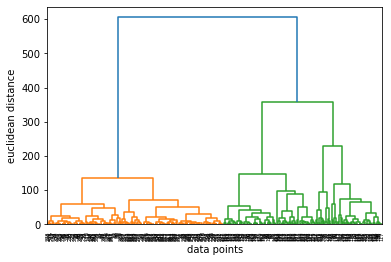

In [106]:

merg = linkage(cluster_data,method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [107]:

h_c = AgglomerativeClustering(n_clusters = 2,affinity= "euclidean",linkage = "ward")
cluster_hc = h_c.fit_predict(cluster_data)

df3["hc_cluster"] = cluster_hc

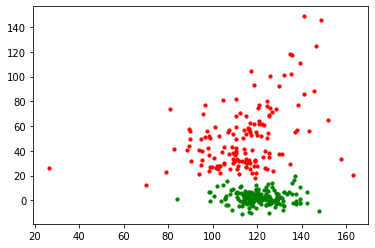

In [108]:
plt.scatter(cluster_data['x1'][cluster_hc==1],cluster_data['x2'][cluster_hc==1],s=10,c='green',label='Normal')
plt.scatter(cluster_data['x1'][cluster_hc==0],cluster_data['x2'][cluster_hc==0],s=10,c='red',label='Anormal')


In [109]:
df3

#Let's we calculate accuracy.
data_for_acc["class"] = [1 if each == "Abnormal" else 0 for each in data_for_acc["class"]]
actual_class=data_for_acc["class"]
predicted_class=df3['hc_cluster']
#data_ac_class = data_ac["class"]
#predict_class = data["label"]
print("accuracy is : {}".format((100 - np.mean(np.abs(actual_class - predicted_class)))/100))
# hc_accuracy = int(100 - np.mean(np.abs(data_ac_class - data["label_hc"])*100))


accuracy is : 0.9947419354838709


In [110]:
df3["hc_cluster"] = [0 if each == 1 else 1 for each in df3["hc_cluster"]]

In [111]:
df3

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,cluster,hc_cluster
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal,0,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal,0,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal,0,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal,0,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal,0,0
...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal,0,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal,0,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal,0,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal,0,0


**Comparing Cluster's Method**

We compare two accuracy with plotly plot 

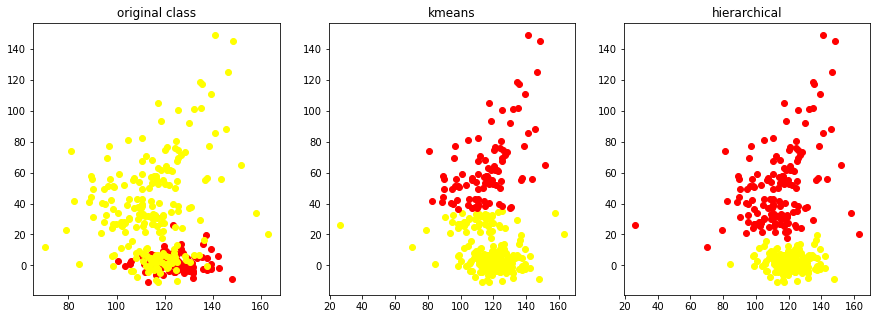

In [112]:
#We compare our model in graph
fig = plt.figure(figsize = (15,5))

plt.subplot(1, 3, 1)
plt.scatter(x = df3[df3["class"] == "Normal"].pelvic_radius , y = df3[df3["class"] == "Normal"].degree_spondylolisthesis,color = "red")
plt.scatter(x = df3[df3["class"] == "Abnormal"].pelvic_radius , y = df3[df3["class"] == "Abnormal"].degree_spondylolisthesis,color = "yellow")
plt.title("original class")

plt.subplot(1, 3, 2)
plt.scatter(x = df3[df3.cluster == 0].pelvic_radius,y = df3[df3.cluster == 0].degree_spondylolisthesis , color = "yellow")
plt.scatter(x = df3[df3.cluster == 1].pelvic_radius,y = df3[df3.cluster == 1].degree_spondylolisthesis , color = "red")
plt.title("kmeans") 

plt.subplot(1, 3, 3)
plt.scatter(x = df3[df3.hc_cluster == 0].pelvic_radius,y = df3[df3.hc_cluster == 0].degree_spondylolisthesis , color = "yellow")
plt.scatter(x = df3[df3.hc_cluster == 1].pelvic_radius,y = df3[df3.hc_cluster == 1].degree_spondylolisthesis , color = "red")
plt.title("hierarchical")

plt.show()

# Thank You!